# Non-Parametric Statistics
Charlie Edelson

Statistics Seminar

March 23, 2017



# Overview
* What are non-parametric statistics?

* Familiar Examples

* Why to use non-parametric statistics

* Commom Tests
    - Bootstrapping
    - Spearman's rank correlation
    - Mann-Whitney U
    - Kruskal-Wallis

# What are Non-Parametric Statistics?
It's helpful to have a definition of *parametric statics*


# Parametric Statistics

* Statistics which assume fixed probability distribution
    - i.e. fixed number of parameters
* Most Common Statitics and Models
    - t-tests
    - ANOVA
    - Linear Regression


* All of the above assume *normality*
    - $\mu$, $\sigma$

# Non-Parametric Statistics
**Anything that isn't parametric!**

...

Okay maybe not

## Multiple Definitions

1. No distributional assumptions

<ol start="2">
    <li>No fixed structure
        <ul>
            <li> Variable number of parameters </li>
        </ul>
    </li>
</ol>

# Familiar Examples
We've already come across a few examples throughout the semester

In [1]:
import numpy
import seaborn
import warnings
from matplotlib import pyplot

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
class point(object):
    def __init__(self, y, x):
        self.y = y
        self.x = x
        self.dist = []

    def addDistance(self,p, d):
        self.dist.append((d,p))

def distance(p1, p2):
    d_square = sum( (a-b) for a,b in zip(p1.x, p2.x) )
    return d_square**.5

def to_points(y,x):
    return [ point(a,[b]) for a,b in numpy.column_stack((y,x)) ]

def from_points(ps):
    y = []
    x = []
    for p in ps:
        y.append(p.y)
        x.append(p.x)
        
    return numpy.array(y), numpy.array(x)

def k_nearest(points,k):
    new_points = []
    for p1 in points:
        for j, p2 in enumerate(points):
            p1.addDistance(p2,distance(p1,p2))
        
        p1.dist = sorted(p1.dist, key=lambda z: z[0])
        p_ks = [ p for d,p in p1.dist[:k]]
        y_sum = 0
        for p_k in p_ks:
            y_sum += p_k.y
        new_points.append(point(y_sum/k, p1.x))

    return new_points

def kNN_plot(y, y_p, x, k):
    points = to_points(y,x)
    
    npoints = k_nearest(points, k)
    y_n, x_n = from_points(npoints)
    
    pyplot.plot(x, y_p, c="r", label="True Function")
    pyplot.plot(x_n, y_n, c="g", label="kNN Estimation")
    pyplot.scatter(x,y, label="Observations")
    pyplot.legend(loc="best")

def kNN_plot_mult(ys, y_p, x, k):
    points = []
    for y in ys:
        points.append(to_points(y,x))

    npoints = []
    for ps in points:
        npoints.append(k_nearest(ps, k))
    
    y_ns = []
    x_ns = []
    for ps in npoints:
        y_n, x_n = from_points(ps)
        y_ns.append(y_n)
        x_ns.append(x_n)

    fig, axes = pyplot.subplots(len(ys))
    for i,ax in enumerate(axes):
        ax.plot(x, y_p, c='r', label="True Function")
        ax.plot(x_ns[i], y_ns[i], c='g', label="kNN Estimation")
        ax.scatter(x,ys[i], label="Observations")

## K Nearest Neighbors
kNN is a good example of a non-parametric model

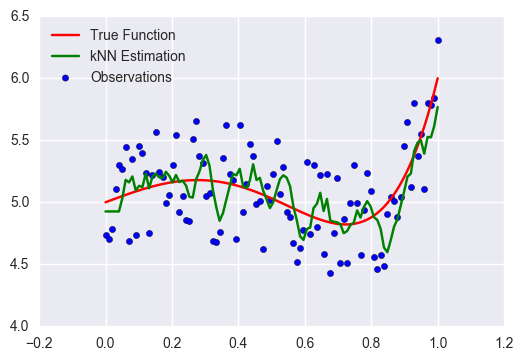

In [10]:
numpy.random.seed(seed=1234)
x = numpy.linspace(0,1,100)
y_p = 5 + x - 5*x**3 + 5*x**5 
n = numpy.random.randint(-100,101,100) * 0.005
y = y_p + n

kNN_plot(y, y_p, x, k=5)

## Common Misconception
Non-parametric statistic *have* parameters

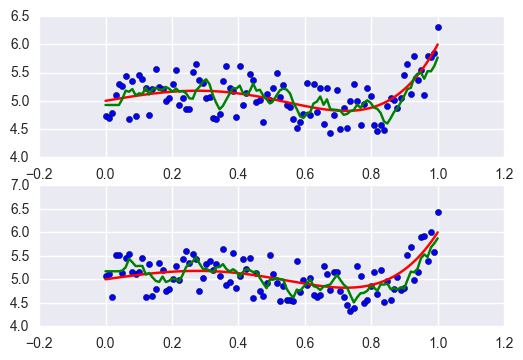

In [11]:
n2 = numpy.random.randint(-100,101,100) * 0.005
y2 = y_p + n2

# k and data are parameters
kNN_plot_mult([y,y2], y_p, x, k=5)

# Another Example: Histogram
* Simple empirical model of distribution
* Widely used and accepted model
* Extremely Flexible

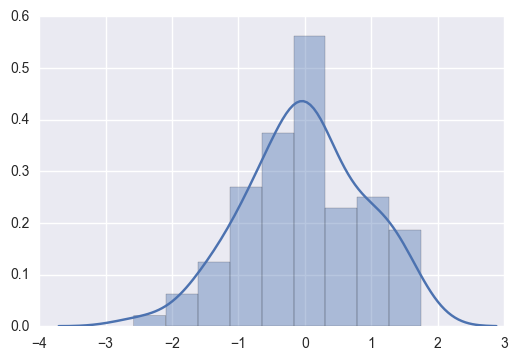

In [12]:
ax = seaborn.distplot(numpy.random.normal(0,1,100))

# Why use Non-Parametric statistics?

* Wider range of applications than parametric statistics
* Robust
    - $<$ assumtions to violate
* Simple
    - Intuitively

## So...why haven't we been using them?

* Lower Power
    - lack of parameterization requires stronger trends
* Not optimal when distribution known
* Often computationally expensive

<img src="images/SMV_example.png">

## Examples of Use Cases
* Non-normal distributions
* No clear parameterization

Popular in Biological Research!

# Common Non-Parametric Statistics

Go through common non-parametric tests

- Bootstrapping
- Spearman's rank correlation
- Mann-Whitney U
- Kruskal-Wallis

# Bootstrapping
* Population resampling for a statistic
* Informs about sample variability
* No assumptions of distribution
* Creates an *Emperical Distribution*

### Example: Minimum Electrosensitivity

Resampled 1,000,000 times

In [35]:
import pandas
df = pandas.read_csv("bootstrap_electro_rm_out.csv", header=None)
emperical_min = df[1]

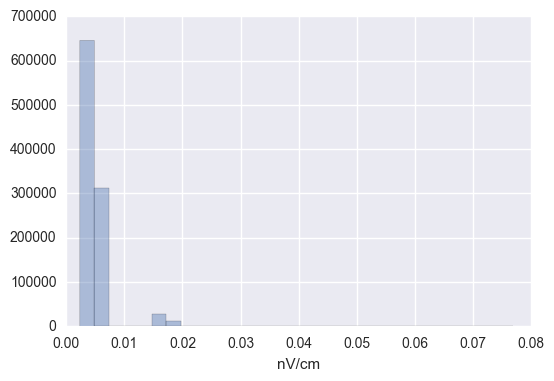

In [41]:
ax = seaborn.distplot(emperical_min, bins=30, kde=False, axlabel="nV/cm")

Constructing the above emperical distribution allows us to see the variance in our minimum

* One tailed
    - Can't have less than the minimum

* Useful for comparing minimums
    - One-tailed 95% confidence

Process can be generalized to any test statistic

# Spearman's Correlation
Person's correlation coefficient is sensitive to sample distribution
* Assume's linear correlation
* Sensitive to Outliers
* Not "Robust"

Would be desirable to have a definition of correlation that is independent of the distribution

## Spearman's Rank Correlation
Vectors of ranked date $X$ and $Y$ of length $n$

$$ \rho_s = \frac{cov(rg_X, rg_Y)}{\sigma_{rg_X} \sigma_{rg_Y}} $$

* Pearson's correlations of ranks
* Monotonic correlation
    - Not linear!
* Extends correlation to ordinal data

### Example: Cubic 
$y = 1.2 + x^2 + 2x^3 + \text{uniform noise}$

In [60]:
from scipy.stats import spearmanr
x = numpy.linspace(0,1,100)
y_p = 1.2 + 3*x**2 + 2*x**3
n = numpy.random.randint(-100,101,100) * 0.005
y = y_p + n 

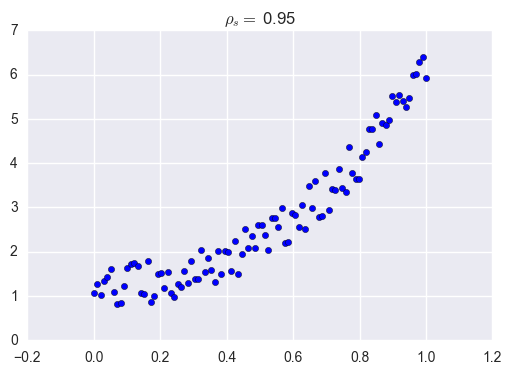

In [62]:
rho = spearmanr(y,x)
pyplot.scatter(x,y)
pyplot.title("$\\rho_s = $ {:.2f}".format(rho[0]))

# Mann-Whitney U Test
* Compare two indepedent samples $X$ and $Y$ with similar distributions
* Similar "spreads"
    - $P(X > Y) = P(Y > X)$
* *Not necesarily normal!*

Need a more robust t-test



## Consider Ranks
For each sample in $X$
1. Compute how many samples of $Y$ where $X_i > Y_j$
    - if $X_i = Y_i$, add 0.5
2. $U_x$ is this sum

Repeate for $Y$ to obtain $U_Y$

$U$ is an unbiased estimator
* Small sample: $P(U)$ via permutation test
* Large sample: $U$ approaches normal
* 95% power of t-test
    

# Kruskal Wallis H Test
* Extends the idea of the Mann-Whitney U test to multiple samples
* Often considered non-parametric one-way ANOVA
* Compute $H$-statistic
$$ H = (N -1) \frac{\sum_{i=1}^g n_i(\bar{r}_i - \bar{r})^2}{\sum_{i=1}^g\sum_{j=1}^{n_i}(r_{ij} - \bar{r})^2 } $$

* Eerily similar to $F$-statistic
    - $\chi^2$ in the limit

# Summary
* Wide variety of non-parametric statistic
* Typically more robust, but less powerful
* Many non-parametric alternatives to parametric test
    - Spearman's rho
    - Mann-Whitney U
    - Kruskal Wallis H

# Thank you for listening!